# Human Activity Recognition with Smartphones

* DecisionTree 연습

### 데이터 설명(출처: kaggle)

For each record in the dataset the following is provided:

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

* Triaxial Angular velocity from the gyroscope.

* A 561-feature vector with time and frequency domain variables.

* Its activity label.

* An identifier of the subject who carried out the experiment.

In [1]:
# 라이브러리 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
train = pd.read_csv('/Users/sungahwang/Desktop/data/ADS/archive/train.csv')
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
test = pd.read_csv('/Users/sungahwang/Desktop/data/ADS/archive/test.csv')
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


# EDA

In [4]:
# 결측값 확인
train.isnull().values.any()

False

* 결측값 없음

In [5]:
# 타깃 정보
train["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [6]:
# 타깃 범주 별 개수
pd.crosstab(index = train["Activity"],columns="count")

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


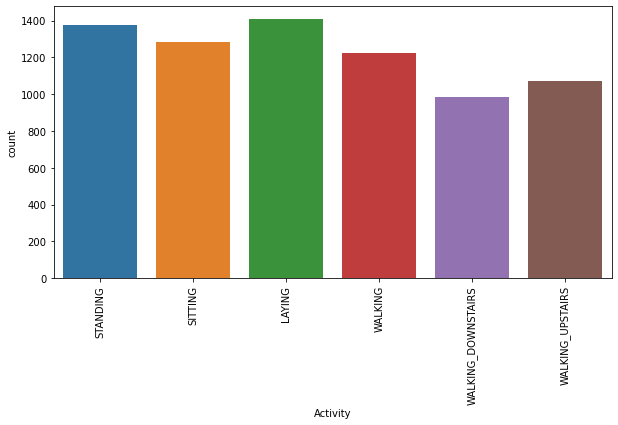

In [7]:
# 타깃 범주 별 개수 시각화
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Activity", data=train)
plt.xticks(x = train['Activity'],  rotation='vertical')
plt.show()

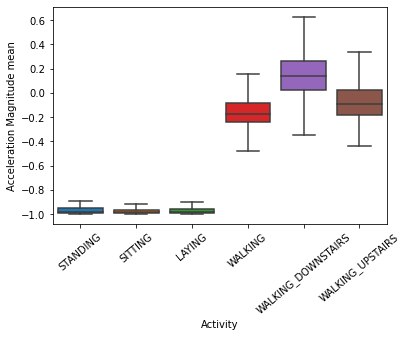

In [8]:
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation = 40)
plt.show()

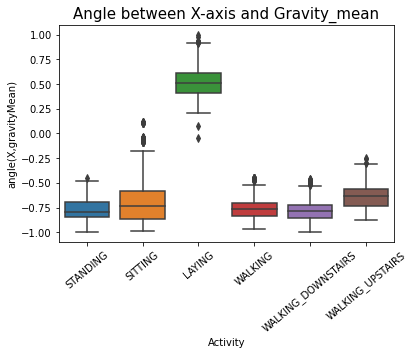

In [9]:
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data= train)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

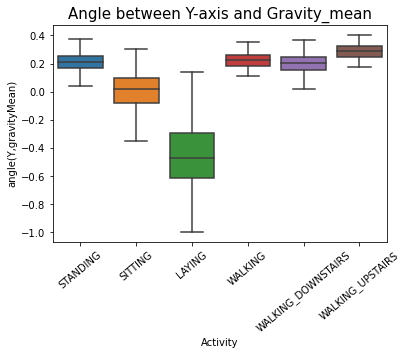

In [10]:
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

## T-sne

In [11]:
from sklearn.manifold import TSNE

In [12]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [13]:
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.001s...
[t-SNE] Computed neighbors for 7352 samples in 1.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125374
[t-SNE] KL divergence after 1000 iterations: 1.282858


<AxesSubplot:>

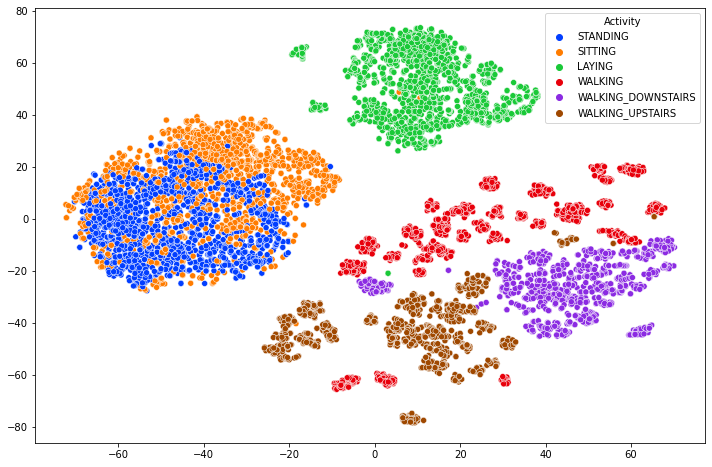

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

# 모델링

In [15]:
# 타깃데이터 설정: Activity
target = train['Activity']
data = train.drop(['Activity'],axis = 1, inplace=False)

In [16]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=156)

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [19]:
pred

array(['STANDING', 'SITTING', 'WALKING_UPSTAIRS', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'LAYING'], dtype=object)

In [20]:
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9420


In [21]:
# 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### GridSeachCV

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split' : [2, 5, 10, 16, 25],
    'max_depth': [6,8,10,12,16,20],
    'min_samples_leaf' : [2, 4, 6, 8],
    'max_features' : [3, 5, 9],
    'max_leaf_nodes' : [2, 3, 4]
}

In [23]:
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose =1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20],
                         'max_features': [3, 5, 9], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 16, 25]},
             scoring='accuracy', verbose=1)

In [24]:
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.5874
GridSearchCV 최고 하이퍼 파라미터: {'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [25]:
params2 = {
    'min_samples_split' : [2, 5, 10, 16, 2],
    'max_depth': [6,8,10,12,16,20],
    'min_samples_leaf' : [2, 4, 6, 8],
    'max_features' : [3, 5, 7, 9],
    'max_leaf_nodes' : [2, 3, 4, 5]
}

In [26]:
grid_cv = GridSearchCV(dt_clf, param_grid = params2, scoring='accuracy', cv = 5, verbose =1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20],
                         'max_features': [3, 5, 7, 9],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 16, 2]},
             scoring='accuracy', verbose=1)

In [27]:
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.6444
GridSearchCV 최고 하이퍼 파라미터: {'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


### RandomizedSearchCV

* GridSearchCV와 다르게 각 파라미터에 범위를 주면 그 범위안에서 랜덤하게 데이터를 추출해서 평가한 다음 그 데이터를 기반으로 더 나은 파라미터를 랜덤하게 추출해서 성능 높은 파라미터를 찾는 방식

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
df_clf3 = DecisionTreeClassifier().fit(X_train, y_train)

In [30]:
random_param = {
    'max_depth' : np.arange(1, 30),
    'max_features' : np.arange(1, 11),
    'min_samples_leaf' : np.arange(1, 20),
    'min_samples_split' : np.arange(0.01, 0.5, 0.01)
}

In [31]:
random_search_for_tree = RandomizedSearchCV(
    df_clf3,
    random_param,
    return_train_score = True,
    n_jobs = -1,
    verbose = 2
).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [32]:
random_df = pd.DataFrame(random_search_for_tree.cv_results_)
random_df.sort_values(by=['rank_test_score'], inplace=True)

random_df[['params','mean_train_score', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_train_score,mean_test_score,rank_test_score
4,"{'min_samples_split': 0.01, 'min_samples_leaf'...",0.841867,0.785854,1
3,"{'min_samples_split': 0.05, 'min_samples_leaf'...",0.730716,0.703838,2
1,"{'min_samples_split': 0.060000000000000005, 'm...",0.664398,0.645553,3
9,"{'min_samples_split': 0.23, 'min_samples_leaf'...",0.651186,0.639909,4
2,"{'min_samples_split': 0.21000000000000002, 'mi...",0.597308,0.581426,5
7,"{'min_samples_split': 0.32, 'min_samples_leaf'...",0.587977,0.581047,6
5,"{'min_samples_split': 0.3, 'min_samples_leaf':...",0.565633,0.562188,7
6,"{'min_samples_split': 0.3, 'min_samples_leaf':...",0.544502,0.540414,8
8,"{'min_samples_split': 0.43, 'min_samples_leaf'...",0.522638,0.509916,9
0,"{'min_samples_split': 0.3, 'min_samples_leaf':...",0.509424,0.491646,10


## max_depths만 조절

In [33]:
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth={0} 정확도:{1:.4f}'.format(depth, accuracy))

max_depth=6 정확도:0.9297
max_depth=8 정확도:0.9429
max_depth=10 정확도:0.9442
max_depth=12 정확도:0.9415
max_depth=16 정확도:0.9447
max_depth=20 정확도:0.9420
max_depth=24 정확도:0.9420


* best: 16, 0.9447

In [34]:
dt_clf2 = DecisionTreeClassifier(random_state=156, max_depth = 16)
dt_clf2.fit(X_train, y_train)
pred = dt_clf2.predict(X_test)

In [35]:
pred

array(['STANDING', 'SITTING', 'WALKING_UPSTAIRS', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'LAYING'], dtype=object)

In [36]:
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9447


## 변수 중요도

In [37]:
ftr_importances_values = dt_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

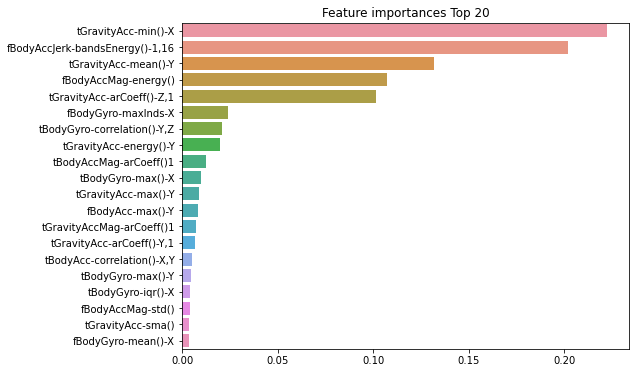

In [38]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

* 높은 중요도를 가진 5개의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있음

## + RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.979601


In [42]:
params = {
    'n_estimators': [100],
    'max_depth': [6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [43]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

[CV] END max_depth=6, max_features=3, min_samples_leaf=13, min_samples_split=0.060000000000000005; total time=   0.1s
[CV] END max_depth=12, max_features=4, min_samples_leaf=5, min_samples_split=0.3; total time=   0.0s
[CV] END max_depth=24, max_features=7, min_samples_leaf=3, min_samples_split=0.3; total time=   0.0s
[CV] END max_depth=4, max_features=9, min_samples_leaf=19, min_samples_split=0.32; total time=   0.1s
[CV] END max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=0.23; total time=   0.1s


/Users/sungahwang/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [44]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9592


In [45]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth= 12, min_samples_leaf=8,
                                 min_samples_split =8, random_state = 0)

In [46]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, random_state=0)

In [47]:
pred = rf_clf1.predict(X_test)

In [48]:
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.973255


In [49]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

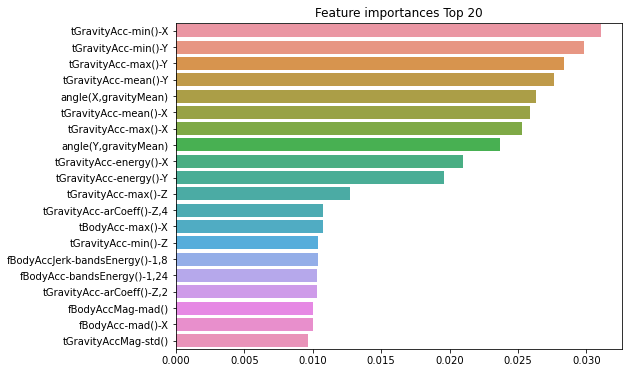

[CV] END max_depth=6, max_features=3, min_samples_leaf=13, min_samples_split=0.060000000000000005; total time=   0.1s
[CV] END max_depth=25, max_features=5, min_samples_leaf=14, min_samples_split=0.21000000000000002; total time=   0.1s
[CV] END max_depth=26, max_features=5, min_samples_leaf=17, min_samples_split=0.01; total time=   0.1s
[CV] END max_depth=24, max_features=7, min_samples_leaf=3, min_samples_split=0.3; total time=   0.0s
[CV] END max_depth=22, max_features=6, min_samples_leaf=18, min_samples_split=0.43; total time=   0.0s
[CV] END max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=0.23; total time=   0.0s
[CV] END max_depth=13, max_features=3, min_samples_leaf=7, min_samples_split=0.3; total time=   0.1s
[CV] END max_depth=25, max_features=5, min_samples_leaf=14, min_samples_split=0.21000000000000002; total time=   0.1s
[CV] END max_depth=9, max_features=4, min_samples_leaf=17, min_samples_split=0.05; total time=   0.1s
[CV] END max_depth=26, max_feature

In [50]:
plt.figure(figsize =(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()